In [1]:
!nvidia-smi

isLocalServer = False
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID-model/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

        # print("System path as follows:")
        # for path in sys.path:
        #     print(f"{path}")

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd

zsh:1: command not found: nvidia-smi
isLocalServer is False
/Volumes/ssd/code/FaceID_model_rebuild


In [19]:
import torch.nn as nn
import torch.optim as optim
from model import build_model, load_dataloader
dataloader_train = load_dataloader('train')
dataloader_val = load_dataloader('val')
dataloader_test = load_dataloader('test')

dataloaders_train = {
    "train": dataloader_train,
    "val": dataloader_val
    }

dataloaders_test = {
    "test": dataloader_test
}

model = build_model(cfg["model"])
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

from model import runner
model, train_res_mat, val_res_mat = runner(
    model,
    ["train", "val"],
    loss_fn,
    optimizer,
    scheduler,
    dataloaders_train,
    num_epochs=20
    )

Epoch 0/19
train Loss: 1.3822 Acc: 0.6308 recall: 0.6382 Precision: 0.5203 avg_prob: 0.2565
val Loss: 1.3808 Acc: 0.6962 recall: 0.6795 Precision: 0.5594 avg_prob: 0.2574
Epoch 1/19
train Loss: 1.3790 Acc: 0.7276 recall: 0.7298 Precision: 0.8398 avg_prob: 0.2588
val Loss: 1.3782 Acc: 0.7595 recall: 0.7500 Precision: 0.8561 avg_prob: 0.2591
Epoch 2/19
train Loss: 1.3757 Acc: 0.7742 recall: 0.7744 Precision: 0.8737 avg_prob: 0.2616
val Loss: 1.3754 Acc: 0.8228 recall: 0.8158 Precision: 0.8750 avg_prob: 0.2613
Epoch 3/19
train Loss: 1.3723 Acc: 0.9211 recall: 0.9202 Precision: 0.9403 avg_prob: 0.2644
val Loss: 1.3724 Acc: 0.9620 recall: 0.9605 Precision: 0.9559 avg_prob: 0.2640
Epoch 4/19
train Loss: 1.3689 Acc: 0.9498 recall: 0.9488 Precision: 0.9586 avg_prob: 0.2678
val Loss: 1.3696 Acc: 0.9873 recall: 0.9907 Precision: 0.9875 avg_prob: 0.2667
Epoch 5/19
train Loss: 1.3654 Acc: 0.9462 recall: 0.9429 Precision: 0.9555 avg_prob: 0.2712
val Loss: 1.3667 Acc: 0.9873 recall: 0.9907 Precision

tensor([[1.3822, 0.6308, 0.6382, 0.5203],
        [1.3790, 0.7276, 0.7298, 0.8398],
        [1.3757, 0.7742, 0.7744, 0.8737],
        [1.3723, 0.9211, 0.9202, 0.9403],
        [1.3689, 0.9498, 0.9488, 0.9586],
        [1.3654, 0.9462, 0.9429, 0.9555],
        [1.3619, 0.9785, 0.9768, 0.9807],
        [1.3599, 0.9749, 0.9726, 0.9777],
        [1.3595, 0.9749, 0.9726, 0.9777],
        [1.3591, 0.9749, 0.9726, 0.9777],
        [1.3588, 0.9749, 0.9726, 0.9777],
        [1.3584, 0.9713, 0.9685, 0.9746],
        [1.3581, 0.9713, 0.9685, 0.9746],
        [1.3577, 0.9713, 0.9685, 0.9746],
        [1.3575, 0.9713, 0.9685, 0.9746],
        [1.3575, 0.9713, 0.9685, 0.9746],
        [1.3574, 0.9713, 0.9685, 0.9746],
        [1.3574, 0.9713, 0.9685, 0.9746],
        [1.3574, 0.9713, 0.9685, 0.9746],
        [1.3573, 0.9713, 0.9685, 0.9746]])
20 4
0


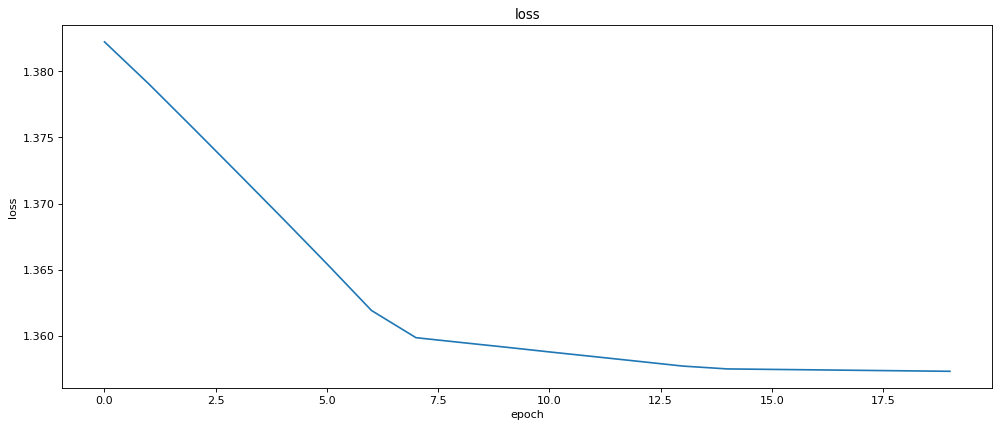

1


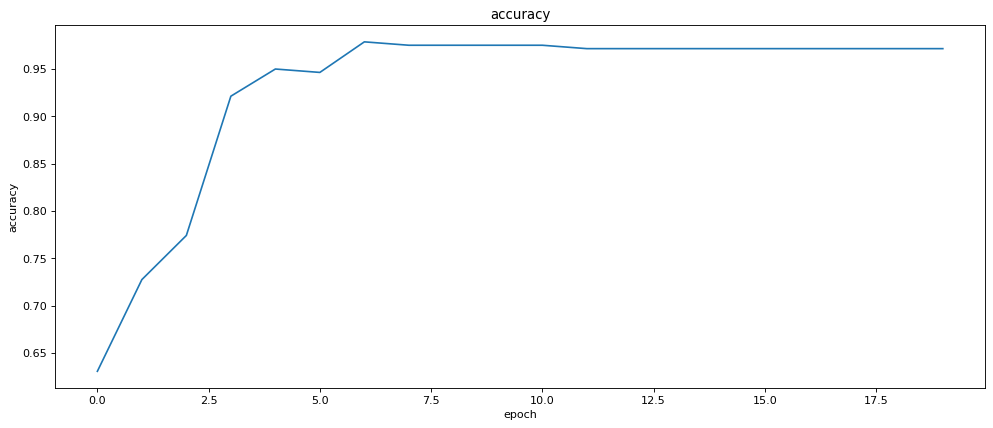

2


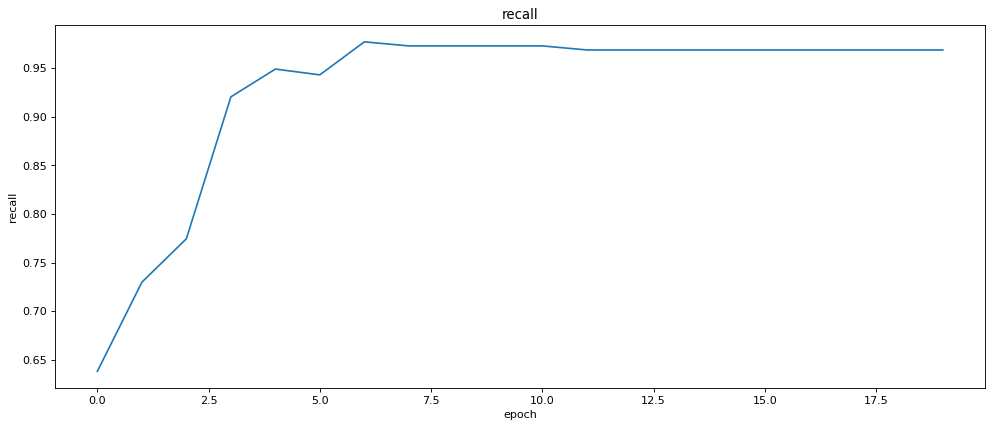

3


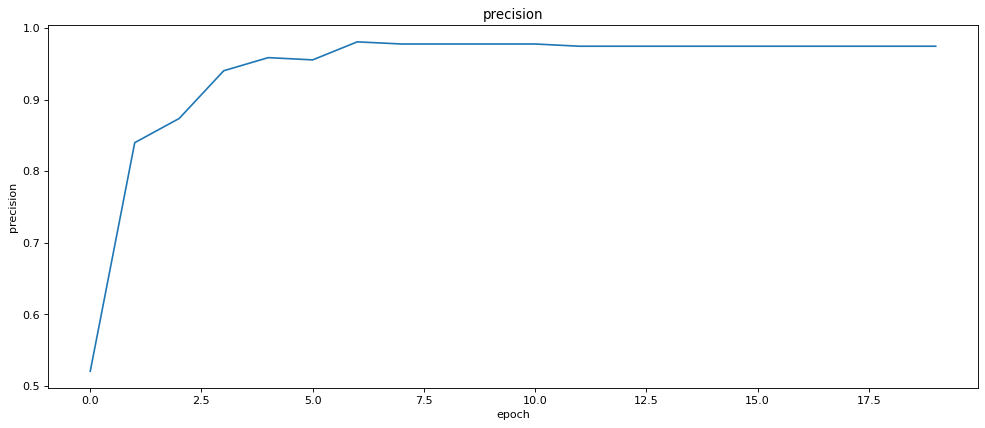

In [20]:
import matplotlib.pyplot as plt
train_evaluation_numpy = train_res_mat
print(train_evaluation_numpy)

num_epochs, num_evaluations = train_evaluation_numpy.shape
print(num_epochs, num_evaluations)


title_list = ['loss', 'accuracy', 'recall', 'precision']
for col, title in zip(range(0, num_evaluations), title_list):
  plt.figure(figsize=(15, 6), dpi=80)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('epoch')
  print(col)
  plt.plot(range(0, num_epochs), train_evaluation_numpy[:, col])
  plt.show()

In [25]:
from model import train_model
train_model(
    model,
    ["test"],
    loss_fn,
    optimizer,
    scheduler,
    dataloaders_test,
    )

Epoch 0/0
test Loss: 1.3638 Acc: 0.8780 recall: 0.8520 Precision: 0.9083 avg_prob: 0.2740
----------------------------------------------------------------------
Training complete in 0m 0s
there is no return value becasue of test mode
